<a href="https://colab.research.google.com/github/eshita-3104/DSDBAL/blob/main/Assgn2_outskew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
def detectoutliers(df,var):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)

  IQR = Q3 - Q1

  high = Q3 + 1.5*IQR
  low = Q1 - 1.5*IQR

  count = df[(df[var]>high)|(df[var]<low)][var].count()
  print("Outlers count is:", count)

  df_new = df[((df[var]<=high) & (df[var]>=low))]
  return df_new

In [9]:
df['gender']=df['gender'].astype('category')
df['gender']=df['gender'].cat.codes

In [10]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


Before removing outliers


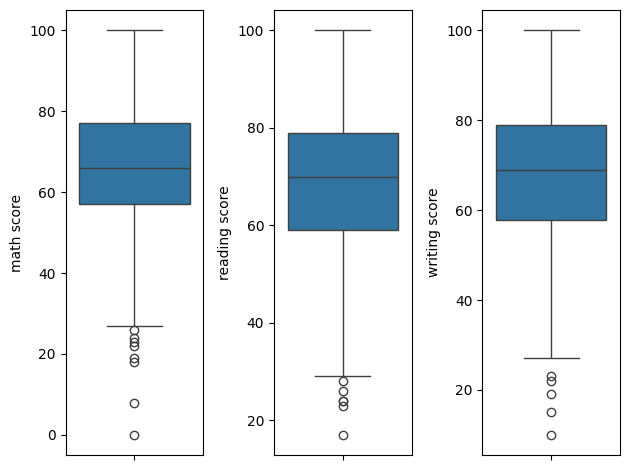

In [13]:
print("Before removing outliers")
fig, axes = plt.subplots(1,3)
sns.boxplot(data=df,y='math score',ax=axes[0])
sns.boxplot(data=df,y='reading score',ax=axes[1])
sns.boxplot(data=df,y='writing score',ax=axes[2])
plt.tight_layout()
plt.show()

In [14]:
df = detectoutliers(df,'math score')

Outlers count is: 8


In [15]:
df = detectoutliers(df,'reading score')

Outlers count is: 6


In [16]:
df= detectoutliers(df,'writing score')

Outlers count is: 0


After removing outliers


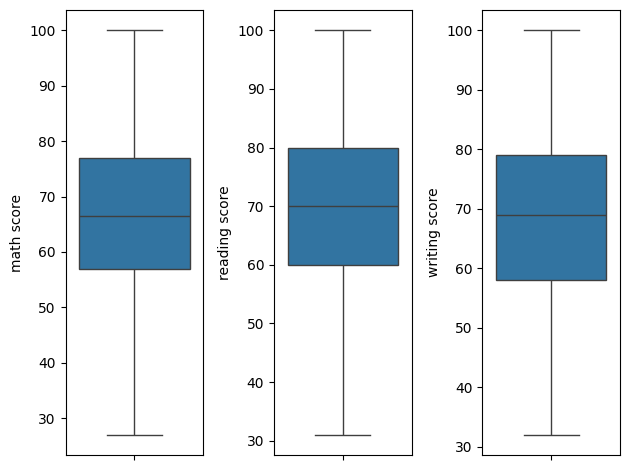

In [17]:
print("After removing outliers")
fig, axes = plt.subplots(1,3)
sns.boxplot(data=df,y='math score',ax=axes[0])
sns.boxplot(data=df,y='reading score',ax=axes[1])
sns.boxplot(data=df,y='writing score',ax=axes[2])
plt.tight_layout()
plt.show()

In [18]:
print('math_Score ', df['math score'].skew())
print('reading_score: ', df['reading score'].skew())
print('writing_score: ', df['writing score'].skew())

math_Score  -0.02597374258403439
reading_score:  -0.07767102775431023
writing_score:  -0.08436233633379218


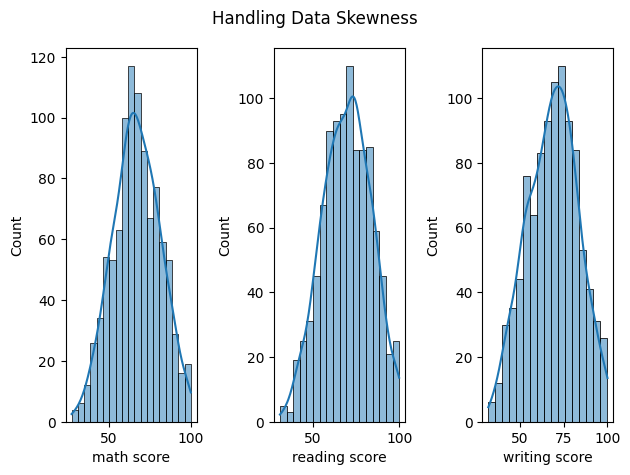

In [20]:
fig, axes = plt.subplots(1,3)
fig.suptitle('Handling Data Skewness')
sns.histplot(ax = axes[0], data = df['math score'], kde=True)
sns.histplot(ax = axes[1], data = df['reading score'], kde=True)
sns.histplot(ax = axes[2], data = df['writing score'], kde=True)
plt.tight_layout()

In [22]:
from sklearn.preprocessing import PowerTransformer
yeojohnTr = PowerTransformer(standardize=True)
df['math score'] = yeojohnTr.fit_transform(df['math score'].values.reshape(-1,1))
df['reading score'] = yeojohnTr.fit_transform(df['reading score'].values.reshape(-1,1))
df['writing score'] = yeojohnTr.fit_transform(df['writing score'].values.reshape(-1,1))

---------------- Data Skew Values after Yeo John Transformation ----------------------


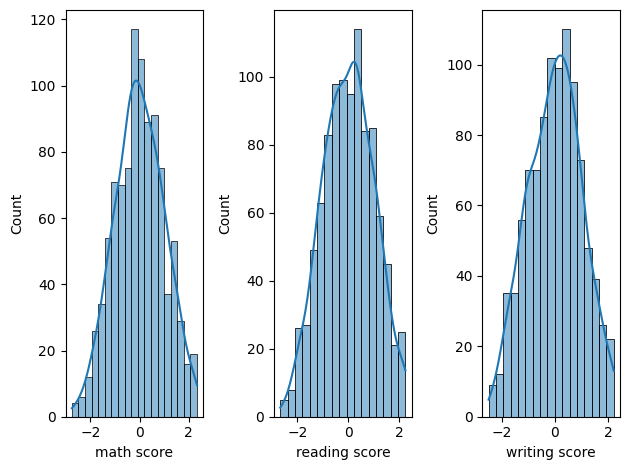

In [24]:
print('---------------- Data Skew Values after Yeo John Transformation ----------------------')

fig, axes = plt.subplots(1,3)
sns.histplot(ax = axes[0], data = df['math score'], kde=True)
sns.histplot(ax = axes[1], data = df['reading score'], kde=True)
sns.histplot(ax = axes[2], data = df['writing score'], kde=True)
plt.tight_layout()
plt.show()